# **Predicting Winner of Indian Premier League (IPL) Matches Using Machine Learning**

---



Prediction of the outcome (winner) of the match
using features like home-ground advantage, team-points, powerplay
performance, and strength of the team players based upon
the past performance in addition to the basic features before the
match begins.




**Team members:**

*   AU1841029 Kalki Bhavsar 
*   AU1841130 Harsh Mange 
*   AU1841138 Vardhan Shah 
*   AU1841139 Khushi Shah 

**Faculty:** Mehul Raval

**Teaching Assistant:** Jay Patel , Arpit Patel

# **PART 1: Getting and Cleaning the dataset**
---

### **Import all the dependent libraries**

Before starting the implemented, first we import all the dependent libraries required further in the code.

Also, global variables like data-set filename and folder is declared here.

In [ ]:
import urllib.request
import os
import pandas as pd 

from bs4 import BeautifulSoup
import requests
import csv

from IPython.display import display, HTML 
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

filename="IPLdataset"
dataset_filename=filename+".csv"
newfolder="IPL_points"

print("All the library imports and variable declaration done successfully...")

All the library imports and variable declaration done successfully...


---
## **Step 1 — Downloading the dataset!**
---



### **Get the dataset csv file**

The data is the key to solve this problem. The data of following
features id, season, city, date, team1, team2, toss winner,
toss decision, result (normal or tie), DL applied, winner,
win by runs, win by wickets player of match, venue,
home ground advantage, umpire1, umpire2, umpire3,
powerplay runs team1, powerplay wickets team1,
powerplay runs team2, powerplay wickets team2,
pitch type, form of player, etc. was downloaded from [here](https://github.com/siddhu21/IPL-Match-Prediction-ML-/raw/main/IPL_2020.xlsx). The following code downloads the xlsx file (the dataset) with filename as **"IPLdataset"**, saves it in the current folder, converts it to csv and deleted the xslx file.

In [ ]:
dataset_filename_excel=filename+".xlsx"

url = 'https://github.com/siddhu21/IPL-Match-Prediction-ML-/raw/main/IPL_2020.xlsx'
urllib.request.urlretrieve(url, filename=dataset_filename_excel)

# Read and store content of an excel file 
read_file = pd.read_excel (dataset_filename_excel)
  
# Write the dataframe object into csv file
read_file.to_csv (dataset_filename, index = None, header=True)
os.remove(dataset_filename_excel)  

print("Dataset file downloaded successfully ...")

Dataset file downloaded successfully ...


### **Scrape the data of IPL points season-wise and team-wise**

Two additional column named "team1_points" and "team2_points" for each match are going to be added. The data required to fill into these two columns was scraped from the official [IPL website](https://www.iplt20.com/). The below code works as follows:


*   Create a folder named "IPL_points" in the current directory if it does not exists
*   Manually checked the source code of the [url]("https://www.iplt20.com/stats/") for all seasons 2008-2020 and found the list of playing teams
*   Hard-coded the dictionary "teams" with keys as seasons and values as list of playing teams' name. 
*   For all the seasons 2008 to 2020, extracted the list of playing teams from dictionary "teams"
    1.   Using beautiful soup library, scraped the data under class-name found manually
    2.   Saved the scraped data into list named "columns"
    3.   Write the list "column" into the new file named "\<season\>\_IPL\_points\_\<team-name\>" saved in the folder "IPL_points"





In [ ]:
cwd = os.getcwd()
if not os.path.exists(newfolder): os.makedirs(newfolder)

teams={
    2008: ['CSK', 'DEC', 'DC', 'KKR', 'MI', 'PBKS', 'RR', 'RCB'],
    2009: ['CSK', 'DEC', 'DC', 'KKR', 'MI', 'PBKS', 'RR', 'RCB'],
    2010: ['CSK', 'DEC', 'DC', 'KKR', 'MI', 'PBKS', 'RR', 'RCB'],
    2011: ['CSK', 'DEC', 'DC', 'KTK', 'KKR', 'MI', 'PWI', 'PBKS', 'RR', 'RCB'],
    2012: ['CSK', 'DEC', 'DC', 'KXIP', 'KKR', 'MI', 'PWI', 'RR', 'RCB'],
    2013: ['CSK', 'DC', 'KKR', 'MI', 'PWI', 'PBKS', 'RR', 'RCB', 'SRH'],
    2014: ['CSK', 'DC', 'KKR', 'MI', 'PBKS', 'RR', 'RCB', 'SRH'],
    2015: ['CSK', 'DC', 'KKR', 'MI', 'PBKS', 'RR', 'RCB', 'SRH'],
    2016: ['DC', 'GL', 'KKR', 'MI', 'PBKS', 'RPS', 'RCB', 'SRH'],
    2017: ['DC', 'GL', 'KKR', 'MI', 'PBKS', 'RPS', 'RCB', 'SRH'],
    2018: ['CSK', 'DC', 'KKR', 'MI', 'PBKS', 'RR', 'RCB', 'SRH'],
    2019: ['CSK', 'DC', 'KKR', 'MI', 'PBKS', 'RR', 'RCB', 'SRH'],
    2020: ['CSK', 'DC', 'KKR', 'MI', 'PBKS', 'RR', 'RCB', 'SRH']
}

for year in range(2008, 2021):
        
    # URL of the ESPN web-page that you want to scrap
    url = "https://www.iplt20.com/stats/"+str(year)+"/player-points"
    html_content = requests.get(url).text
    # print(html_content)
    soup = BeautifulSoup(html_content, 'html.parser')

    data = {}

    stats_table = soup.find("table", attrs={"class": "table table--scroll-on-tablet top-players"})
    # stats_table_columns = stats_table.thead.find_all("tr")
    team_names = teams[year]
    columns = ['POS', 'PLAYER', 'Pts', 'Mat', 'Wkts',
            'Dots', '4s', '6s', 'Catches', 'Stumpings']
    # for tr in stats_table_columns:
    #     for th in tr.find_all("th"):
    #         columns.append(th.text.replace('\n', ' ').strip())

    # print("columns",columns)
    for name in team_names:
        table_data = []
        for tr in stats_table.find_all("tr", {'class': ['js-row '+name+' is-odd', 'js-row '+name]}):
            t_row = {}

            for td, th in zip(tr.find_all("td"), columns):
                if(td.index == 1):
                    name = td.find_all("div", {'class': 'top-players__player-info'}).find_all(
                        "div", {'class': 'top-players__player-name'}).find_all("a")
                    t_row[th] = name.text.replace('\n', '').strip()
                else:
                    t_row[th] = td.text.replace('\n', '').strip()

            table_data.append(t_row)
        # print("table_data", table_data)

        
    # Exporting...
    # Name of the file that you want to export in CSV
        if name=='DEC':
            teamname='SRH'
        else:        
            teamname=name

        filename=cwd+"/IPL_points/"+str(year)+"_IPL_points_"+teamname+".csv"
        # print("Writing file ", filename)
        with open(filename, 'w+') as out_file:
            writer = csv.DictWriter(out_file, columns)

            writer.writeheader()
            for row in table_data:
                if row:
                    writer.writerow(row)

print('Data files of IPL points of all the teams season-wise are downloaded successfully in the folder "IPL_teams"...')

Data files of IPL points of all the teams season-wise are downloaded successfully in the folder "IPL_teams"...


---
## **Step 2 — Getting the dataset into the playground**
---



### **Reading the data-set**

We use **.read_csv()** to read the CSV file. The path in the .read_csv() function can be relative or absolute. Here, our dataset file is downloaded in the same folder where this notebook is stored. Hence, we just give the filename what we previous used to download the dataset-file. 

That filename is stored in the variable **"dataset_filename"**

In [ ]:
# Importing the dataset
df=pd.read_csv(dataset_filename)  # dataframe of the da
# display(df.head())
print("Dataset read and is exported to dataframed named 'df'...")

Dataset read and is exported to dataframed named 'df'...


---
##**Step 3 - Cleaning the data-set!**
---

### **Dealing with null values**

#### **Check for Null Values**

The data that we have, may contain null values in several columns.

First, we print the name of columns that has null values along with number of rows with null values.

In [ ]:
# Check for Null Values
print("\tOhh no! We spotted some null values... \n")
column_no=0
columns_with_nullval=[]
for column in df:  
  total_null_values = int(str(df.iloc[:, column_no].isnull().sum()))
  if total_null_values > 0:
    print( "Total null values = ", total_null_values, " \tfor column-name: ", column)
  column_no += 1

	Ohh no! We spotted some null values... 

Total null values =  7  	for column-name:  city
Total null values =  62  	for column-name:  umpire1
Total null values =  62  	for column-name:  umpire2
Total null values =  694  	for column-name:  umpire3


 **Output:**

Total null values =  7    	for column-name:  city

Total null values =  62   	for column-name:  umpire1

Total null values =  62   	for column-name:  umpire2

Total null values =  694  	for column-name:  umpire3

**Inference:**

=> Find some way to insert values in the column city where value is null

=> Drop the feature umpire1, umpire2, and umpire3 since there are lots of null values. 


#### **Remove the columns with more Null Values**

In [ ]:
print("\nRemoving 'umpire1', 'umpire2', 'umpire3' columns with full of null values...")
# Dropping the columns 'umpire1', 'umpire2', and 'umpire3'
df=df.drop(['umpire1', 'umpire2', 'umpire3'], axis=1)
# display(df.head())
print("3 columns 'umpire1', 'umpire2', 'umpire3' removed successfully...")


Removing 'umpire1', 'umpire2', 'umpire3' columns with full of null values...
3 columns 'umpire1', 'umpire2', 'umpire3' removed successfully...


#### **Filling the null values in column city**

Using Imputation method to fill the null values in **city** column.

Imputation is a way to fill the missing values statistically. 

In [ ]:
# getting series True for NaN values
rowidx = pd.isnull(df["city"])
 
# filtering data where city is NaN or null or empty
df[rowidx][['venue', 'city']] 

,venue,city
460,Dubai International Cricket Stadium,NaN
461,Dubai International Cricket Stadium,NaN
465,Dubai International Cricket Stadium,NaN
467,Dubai International Cricket Stadium,NaN
468,Dubai International Cricket Stadium,NaN
473,Dubai International Cricket Stadium,NaN
475,Dubai International Cricket Stadium,NaN


In [ ]:
# replacing the null values with "Dubai" 
# since all the stadium values with null venues
# is "Dubai International Cricket Stadium"
df.loc[rowidx,'city'] = "Dubai"

### **Generalizing naming conventions**

#### **Renaming the team names**
 

First, let's see all the team names in alphabetical order!

In [ ]:
IPL_teams=list(set(df['team1']).union(set(df['team2'])))
IPL_teams.sort()
print("IPL TEAMS")
for team_name in IPL_teams:
  print(team_name)

IPL TEAMS
Chennai Super Kings
Deccan Chargers
Delhi Capitals
Delhi Daredevils
Gujarat Lions
Kings XI Punjab
Kochi Tuskers Kerala
Kolkata Knight Riders
Mumbai Indians
Pune Warriors
Rajasthan Royals
Rising Pune Supergiant
Royal Challengers Bangalore
Sunrisers Hyderabad


From few courses we found that:

*   Deccan Chargers (DEC) was renamed to Sunrisers Hyderabad (SRH) in 2012 [[1]](https://en.wikipedia.org/wiki/Deccan_Chargers).
*  Delhi Daredevils (DD) was renamed to Delhi Capitals (DC)  [[2]](https://en.wikipedia.org/wiki/Delhi_Capitals)
*  Kings XI Punjab was renamed to Punjab Kings (but still KXIP) in 2021
[[3]]( https://en.wikipedia.org/wiki/Punjab_Kings).

In [ ]:
# Replacing all the team names with its abbrevations 
# to reduce space occupied by unwanted lengthy team names
df.replace("Chennai Super Kings", "CSK", inplace=True)
df.replace("Deccan Chargers", "SRH", inplace=True)
df.replace("Delhi Capitals", "DC", inplace=True)
df.replace("Delhi Daredevils", "DC", inplace=True)
df.replace("Gujarat Lions", "GL", inplace=True)
df.replace("Kings XI Punjab", "PBKS", inplace=True)
df.replace("Kochi Tuskers Kerala", "KTK", inplace=True)
df.replace("Kolkata Knight Riders", "KKR", inplace=True)
df.replace("Mumbai Indians", "MI", inplace=True)
df.replace("Pune Warriors", "PWI", inplace=True)
df.replace("Rajasthan Royals", "RR", inplace=True)
df.replace("Rising Pune Supergiant", "RPS", inplace=True)
df.replace("Royal Challengers Bangalore", "RCB", inplace=True)
df.replace("Sunrisers Hyderabad", "SRH", inplace=True)
# display(df.head())
print("All the team names were replaced with its abbrevations successfully...")

All the team names were replaced with its abbrevations successfully...


Printing all the team names again to check!

In [ ]:
IPL_teams=list(set(df['team1']).union(set(df['team2'])))
IPL_teams.sort()
print("IPL TEAMS")
for team_name in IPL_teams:
  print(team_name)

IPL TEAMS
CSK
DC
GL
KKR
KTK
MI
PBKS
PWI
RCB
RPS
RR
SRH


#### **Renaming the venue and city columns**

##### **Checking for the same venue, different venue names**

We have to solve this problem manually.

We print the columns venue and city twice.

1. In the first time, the two columns sorted by **city**.
2. In the second time the two columns sorted by **venue**.

Since, we have sorted columns, it becomes easier to spot the rows representing same names with different convention. 

For example the following two rows (when sorted by venue):
*   Feroz Shah Kotla Delhi
*   Feroz Shah Kotla Ground Delhi

For example the following two rows (when sorted by city):
*   ACA-VDCA Stadium Visakhapatnam
*   Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium Visakhapatnam



In [ ]:
print("\n\tVenue and City column sorted by city...")
df[['venue', 'city']].drop_duplicates(subset=['venue', 'city'], keep='last').sort_values(by='city')

# print(df[['venue', 'city']].drop_duplicates(subset=['venue', 'city'], keep='last').sort_values(by='venue').values.tolist())


	Venue and City column sorted by city...


,venue,city
810,Sheikh Zayed Stadium,Abu Dhabi
538,"Sardar Patel Stadium, Motera",Ahmedabad
632,M Chinnaswamy Stadium,Bangalore
745,M. Chinnaswamy Stadium,Bengaluru
683,M Chinnaswamy Stadium,Bengaluru
164,OUTsurance Oval,Bloemfontein
129,Newlands,Cape Town
171,SuperSport Park,Centurion
618,"Punjab Cricket Association IS Bindra Stadium, ...",Chandigarh
566,"Punjab Cricket Association Stadium, Mohali",Chandigarh


In [ ]:
print("\n\tVenue and City column sorted by venue...")
df[['venue', 'city']].drop_duplicates(subset=['venue', 'city'], keep='last').sort_values(by='venue')


	Venue and City column sorted by venue...


,venue,city
750,ACA-VDCA Stadium,Visakhapatnam
495,Barabati Stadium,Cuttack
567,Brabourne Stadium,Mumbai
149,Buffalo Park,East London
154,De Beers Diamond Oval,Kimberley
297,Dr DY Patil Sports Academy,Mumbai
625,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Visakhapatnam
811,Dubai International Cricket Stadium,Dubai
739,Eden Gardens,Kolkata
687,Feroz Shah Kotla,Delhi


**Output:**

Redundant values found manually are as follows:

________________________________________________________________________________

**Location 1:** Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium **Visakhapatnam**

Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium **Visakhapatnam**

Dr. Y.S.R. ACA VDCA Cricket Stadium **Visakhapatnam**

________________________________________________________________________________

**Location 2:** Arun Jaitley Stadium	**Delhi**

Feroz Shah Kotla	**Delhi**

Feroz Shah Kotla Ground	**Delhi**
________________________________________________________________________________

**Location 3:** M. Chinnaswamy Stadium **Bangalore**

M Chinnaswamy Stadium	**Bengaluru**

M Chinnaswamy Stadium	**Bangalore**

M. Chinnaswamy Stadium	**Bengaluru**

________________________________________________________________________________

**Location 4:** M. A. Chidambaram Stadium **Chennai**

M. A. Chidambaram Stadium	**Chennai**

MA Chidambaram Stadium, Chepauk	**Chennai**

________________________________________________________________________________

**Location 5:** Punjab Cricket Association IS Bindra Stadium **Mohali**

Punjab Cricket Association IS Bindra Stadium, Mohali  **Chandigarh**

Punjab Cricket Association IS Bindra Stadium, Mohali **Mohali**

Punjab Cricket Association Stadium, Mohali **Chandigarh**

IS Bindra Stadium	**Mohali**

________________________________________________________________________________

**Location 6:** Rajiv Gandhi International Cricket Stadium **Hyderabad**

Rajiv Gandhi International Stadium, Uppal	**Hyderabad**

Rajiv Gandhi Intl. Cricket Stadium **Hyderabad**

________________________________________________________________________________

**Location 7:** Maharashtra Cricket Association Stadium	 **Pune**

Subrata Roy Sahara Stadium	**Pune**

Maharashtra Cricket Association Stadium **Pune**

________________________________________________________________________________


##### **Replacing the same venue, different venue names**



In [ ]:
# Location 1
df.replace("Dr. Y.S.R. ACA VDCA Cricket Stadium", "Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium", inplace=True)

# Location 2
df.replace("Feroz Shah Kotla", "Arun Jaitley Stadium", inplace=True)
df.replace("Feroz Shah Kotla Ground", "Arun Jaitley Stadium", inplace=True)

# Location 3
df.replace("M Chinnaswamy Stadium", "M. Chinnaswamy Stadium", inplace=True)
df.replace("Bengaluru", "Bangalore", inplace=True)

# Location 4
df.replace("MA Chidambaram Stadium, Chepauk", "M. A. Chidambaram Stadium", inplace=True)

# Location 5
df.replace("Punjab Cricket Association IS Bindra Stadium, Mohali", "Punjab Cricket Association IS Bindra Stadium", inplace=True)
df.replace("Punjab Cricket Association IS Bindra Stadium, Mohali", "Punjab Cricket Association IS Bindra Stadium", inplace=True)
df.replace("Punjab Cricket Association Stadium, Mohali", "Punjab Cricket Association IS Bindra Stadium", inplace=True)
df.replace("IS Bindra Stadium", "Punjab Cricket Association IS Bindra Stadium", inplace=True)
df.replace("Chandigarh", "Mohali", inplace=True)

# Location 6
df.replace("Rajiv Gandhi International Stadium, Uppal", "Rajiv Gandhi International Cricket Stadium", inplace=True)
df.replace("Rajiv Gandhi Intl. Cricket Stadium", "Rajiv Gandhi International Cricket Stadium", inplace=True)

# Location 7
df.replace("Subrata Roy Sahara Stadium", "Maharashtra Cricket Association Stadium", inplace=True)

# Display the new dataframe after the replacement
# display(df.head())

print("The naming conventions of columns 'venue' and 'city' were updated successfully...")

The naming conventions of columns 'venue' and 'city' were updated successfully...


Phew!! The data is clean now. We can finally start on analyzing the features (columns).

---
## **Step 4 — Adding new columns to dataframe**
---

### **Adding the column "team1_points" and "team2_points"**

In [ ]:
df['team1_points'] = 0
df['team2_points'] = 0

directory = r'./'+newfolder

for filename in os.listdir(directory):

    if filename.endswith(".csv"):        

        filepath=os.path.join(directory, filename)
        points_df = pd.read_csv(filepath)
        total_points = points_df['Pts'].sum()

        [season, team_name]=list(map(str,filename.split('_IPL_points_')))        
        season=int(season)
        team_name=team_name[:-4]
        # print("\nSeason=", season)
        # print("team=", team_name)
        team1_index=set(df.index[df['season'] == season].tolist()) & set(df.index[df['team1'] == team_name].tolist())
        team2_index=set(df.index[df['season'] == season].tolist()) & set(df.index[df['team2'] == team_name].tolist())
        df.loc[team1_index,'team1_points'] = int(total_points)
        df.loc[team2_index,'team2_points'] = int(total_points)
        # print(teampoints)        
    else: continue

# df.head()
print("2 new columns added: team1_points, team2_points ...")

2 new columns added: team1_points, team2_points ...


### **Adding the column "homeground_advantage"**

Print all the unique venue names 

Goal: to assign hometeam to each ground seasonwise

In [ ]:
venues=list(df.venue.unique())
venues.sort()
for venue in venues: print(venue)

ACA-VDCA Stadium
Arun Jaitley Stadium
Barabati Stadium
Brabourne Stadium
Buffalo Park
De Beers Diamond Oval
Dr DY Patil Sports Academy
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium
Dubai International Cricket Stadium
Eden Gardens
Green Park
Himachal Pradesh Cricket Association Stadium
Holkar Cricket Stadium
JSCA International Stadium Complex
Kingsmead
M. A. Chidambaram Stadium
M. Chinnaswamy Stadium
Maharashtra Cricket Association Stadium
Nehru Stadium
New Wanderers Stadium
Newlands
OUTsurance Oval
Punjab Cricket Association IS Bindra Stadium
Rajiv Gandhi International Cricket Stadium
Sardar Patel Stadium, Motera
Saurashtra Cricket Association Stadium
Sawai Mansingh Stadium
Shaheed Veer Narayan Singh International Stadium
Sharjah Cricket Stadium
Sheikh Zayed Stadium
St George's Park
SuperSport Park
Vidarbha Cricket Association Stadium, Jamtha
Wankhede Stadium


Create a set of Overseas venues named "overseas_venues":

source: [Wikipedia](https://en.wikipedia.org/wiki/List_of_Indian_Premier_League_venues)


In [ ]:
overseas_venues=(
    "Newlands",
    "St George's Park",
    "Kingsmead",
    "SuperSport Park",
    "Buffalo Park",
    "New Wanderers Stadium",
    "De Beers Diamond Oval",
    "OUTsurance Oval",
    "Sheikh Zayed Stadium",
    "Sharjah Cricket Stadium",
    "Dubai International Cricket Stadium"
)
indian_venues=list(set(venues).difference(overseas_venues))
indian_venues.sort()

print("Total venues: ", len(venues))
print("Total overseas venues: ", len(overseas_venues))
print("Total Indian venues: ", len(indian_venues))

# for venue in indian_venues: print(venue)

Total venues:  34
Total overseas venues:  11
Total Indian venues:  23


**Output:**

Total venues:  34

Total overseas venues:  11

Total Indian venues:  23

##### **Create one list of the homegrounds of all the team according to the seasons**

In [ ]:
# CONVENTION: (venue, starting season, ending season, teamname)

# Feroz Shah Kotla Ground
# ACA-VDCA Stadium 
# Jawaharlal Nehru Stadium
# Raipur international cricket stadium

homes=[
    ("Arun Jaitley Stadium", 2008, 2019, 'DC'),

    ("Barabati Stadium", 2010, 2012, 'SRH'),
    ("Barabati Stadium", 2014, 2014, 'PBKS'),
    ("Barabati Stadium", 2014, 2014, 'KKR'),
    ("Brabourne Stadium", 2010, 2010, 'MI'),
    ("Brabourne Stadium", 2015, 2015, 'RR'),

    ("Dr DY Patil Sports Academy", 2008, 2008, 'MI'),
    ("Dr DY Patil Sports Academy", 2010, 2010, 'SRH'),
    ("Dr DY Patil Sports Academy", 2011, 2011, 'PWI'),
    ("Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium", 2012, 2012, 'SRH'),
    ("Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium", 2015, 2015, 'SRH'),
    ("Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium", 2016, 2016, 'MI'),
    ("Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium", 2016, 2016, 'RPS'),

    ("Eden Gardens", 2008, 2019, 'KKR'),
    ("Green Park", 2016, 2017, 'GL'),

    ("Himachal Pradesh Cricket Association Stadium", 2010, 2013, 'PBKS'),
    ("Holkar Cricket Stadium", 2011, 2011, 'KTK'),
    ("Holkar Cricket Stadium", 2017, 2018, 'PBKS'),

    ("JSCA International Stadium Complex", 2013, 2013, 'KKR'),
    ("JSCA International Stadium Complex", 2014, 2014, 'CSK'),
    ("Nehru Stadium", 2011, 2011, 'KTK'),

    ("M. A. Chidambaram Stadium", 2008, 2019, 'CSK'),
    ("M. Chinnaswamy Stadium", 2008, 2010, 'RCB'),
    ("Maharashtra Cricket Association Stadium", 2012, 2013, 'PWI'),
    ("Maharashtra Cricket Association Stadium", 2015, 2015, 'PBKS'),
    ("Maharashtra Cricket Association Stadium", 2016, 2017, 'PBKS'),
    ("Maharashtra Cricket Association Stadium", 2018, 2018, 'CSK'),


    ("Punjab Cricket Association IS Bindra Stadium", 2008, 2019, 'PBKS'),
    ("Rajiv Gandhi International Cricket Stadium", 2008, 2012, 'SRH'),
    ("Rajiv Gandhi International Cricket Stadium", 2013, 2019, 'SRH'),

    ("Sardar Patel Stadium, Motera", 2010, 2015, 'RR'),
    ("Saurashtra Cricket Association Stadium", 2016, 2017, 'GL'),
    ("Sawai Mansingh Stadium", 2008, 2019, 'RR'),
    ("Shaheed Veer Narayan Singh International Stadium", 2013, 2016, 'DD'),

    ("Vidarbha Cricket Association Stadium, Jamtha", 2010, 2010, 'SRH'),
    ("Wankhede Stadium", 2008, 2019, 'MI'),

]

print(homes)

[('Arun Jaitley Stadium', 2008, 2019, 'DC'), ('Barabati Stadium', 2010, 2012, 'SRH'), ('Barabati Stadium', 2014, 2014, 'PBKS'), ('Barabati Stadium', 2014, 2014, 'KKR'), ('Brabourne Stadium', 2010, 2010, 'MI'), ('Brabourne Stadium', 2015, 2015, 'RR'), ('Dr DY Patil Sports Academy', 2008, 2008, 'MI'), ('Dr DY Patil Sports Academy', 2010, 2010, 'SRH'), ('Dr DY Patil Sports Academy', 2011, 2011, 'PWI'), ('Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium', 2012, 2012, 'SRH'), ('Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium', 2015, 2015, 'SRH'), ('Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium', 2016, 2016, 'MI'), ('Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium', 2016, 2016, 'RPS'), ('Eden Gardens', 2008, 2019, 'KKR'), ('Green Park', 2016, 2017, 'GL'), ('Himachal Pradesh Cricket Association Stadium', 2010, 2013, 'PBKS'), ('Holkar Cricket Stadium', 2011, 2011, 'KTK'), ('Holkar Cricket Stadium', 2017, 2018, 'PBKS'), ('JSCA International Stadium Complex', 2013, 2013, 'KKR'),

##### **Add a new column named "homeground_advantage"**



**values:**

<team1-name> if venue is homeground of team1

<team2-name> if venue is homeground of team2

"both" is venue is homeground of both of team1 and team2

"none" is venue is homeground of none of team1 or team2

"overseas" is venue is overseas

In [ ]:
df['homeground_advantage']="none"

# ground is a tuple in homes list
for ground in homes:
    # ground[0] is venue name
    row_indices=set(df.index[df['venue'] == ground[0]].tolist())
    if len(row_indices)==0:
        print("Why no value in set????????")
    season_index=[]
    # ground[1] is starting season and ground[2] is ending season
    for season_year in range(ground[1], ground[2]+1):    
        season_index+=list(set(df.index[df['season'] == season_year].tolist()))
    
    row_indices.intersection(season_index)
    # print(ground[0], row_indices)

    for row in list(row_indices):
        #print(row)
        if df.loc[row,'team1'] == ground[3] and df.loc[row,'team2'] == ground[3]:
            # print("Both teams has advantage ", ground[3])
            df.loc[row,'homeground_advantage'] = "both"
        if df.loc[row,'team1'] == ground[3]:
            # print("Team1 has advantage ", ground[3])
            df.loc[row,'homeground_advantage'] = ground[3]
        elif df.loc[row,'team2'] == ground[3]:
            # print("Team2 has advantage ", ground[3])
            df.loc[row,'homeground_advantage'] =  ground[3]

for overseas in overseas_venues:
   df['homeground_advantage'][df.venue == overseas] = "overseas"            
        

df.head(5)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,id,season,city,date,team1,Pplay T1,pplay twick1,team2,Pplay T2,pplay twick2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,Avg 1st Innings Score,Avg 2nd Innings Score,Pitch Type,team1_points,team2_points,homeground_advantage
0,1,2017,Hyderabad,2017-04-05,SRH,59,1,RCB,54,1,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,Rajiv Gandhi International Cricket Stadium,185,175,Batting,660,805,SRH
1,2,2017,Pune,2017-04-06,MI,61,1,RPS,59,1,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,160,148,Batting & Spinner Friendly,936,835,none
2,3,2017,Rajkot,2017-04-07,GL,52,1,KKR,73,0,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,183,170,Batting,536,812,GL
3,4,2017,Indore,2017-04-08,RPS,35,1,PBKS,56,2,PBKS,field,normal,0,PBKS,0,6,GJ Maxwell,Holkar Cricket Stadium,160,158,Batting,835,768,PBKS
4,5,2017,Bangalore,2017-04-08,RCB,41,2,DC,43,2,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M. Chinnaswamy Stadium,170,150,Batting,805,1178,RCB


Print 

In [ ]:
print(list(df.homeground_advantage.unique()))

['SRH', 'none', 'GL', 'PBKS', 'RCB', 'MI', 'KKR', 'DC', 'RR', 'CSK', 'overseas', 'KTK', 'PWI', 'RPS']


## **Export the new .csv file, our cleaned new dataset file!**

In [ ]:
dataset_file="dataset.csv"
df.to_csv(dataset_file, index = True)
# df.head()
print("New file named '", dataset_file, "' exported successfully...")

New file named ' dataset.csv ' exported successfully...


# **PART 2: Data Analysis and Visualization**
---

### Playing with charts and barplots!

In [ ]:
#123

# **PART 3: Modelling**
---

---
## **Step 7 — Feature Engineering**
---

The column values should make some sense to the computers. 
Since the computer don’t have the ability to understand and draw inference from the text, we need to encode the strings to **numeric categorical values**. 
Encoding ways:
1. Manually
2. Using *LabelEncoder()* from the Scikit-learn library

Feature engineering has two goals primarily: 
1. Preparing the proper input dataset, compatible with the machine learning algorithm requirements. 
2. Improving the performance of machine learning models.


In [ ]:
data=pd.read_csv("dataset.csv")  

In [ ]:
# Print list of columns in our dataset 
features=list(data.columns) 
for feature in features: print(feature)
data.head(10)

Unnamed: 0
id
season
city
date
team1
Pplay T1
pplay twick1
team2
Pplay T2
pplay twick2
toss_winner
toss_decision
result
dl_applied
winner
win_by_runs
win_by_wickets
player_of_match
venue
Avg 1st Innings Score
Avg 2nd Innings Score
Pitch Type
team1_points
team2_points
homeground_advantage


,Unnamed: 0,id,season,city,date,team1,Pplay T1,pplay twick1,team2,Pplay T2,pplay twick2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,Avg 1st Innings Score,Avg 2nd Innings Score,Pitch Type,team1_points,team2_points,homeground_advantage
0,0,1,2017,Hyderabad,2017-04-05,SRH,59,1,RCB,54,1,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,Rajiv Gandhi International Cricket Stadium,185,175,Batting,660,805,SRH
1,1,2,2017,Pune,2017-04-06,MI,61,1,RPS,59,1,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,160,148,Batting & Spinner Friendly,936,835,none
2,2,3,2017,Rajkot,2017-04-07,GL,52,1,KKR,73,0,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,183,170,Batting,536,812,GL
3,3,4,2017,Indore,2017-04-08,RPS,35,1,PBKS,56,2,PBKS,field,normal,0,PBKS,0,6,GJ Maxwell,Holkar Cricket Stadium,160,158,Batting,835,768,PBKS
4,4,5,2017,Bangalore,2017-04-08,RCB,41,2,DC,43,2,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M. Chinnaswamy Stadium,170,150,Batting,805,1178,RCB
5,5,6,2017,Hyderabad,2017-04-09,GL,40,2,SRH,59,1,SRH,field,normal,0,SRH,0,9,Rashid Khan,Rajiv Gandhi International Cricket Stadium,185,175,Batting,536,660,SRH
6,6,7,2017,Mumbai,2017-04-09,KKR,59,2,MI,49,0,MI,field,normal,0,MI,0,4,N Rana,Wankhede Stadium,194,182,Both,812,936,MI
7,7,8,2017,Indore,2017-04-10,RCB,23,3,PBKS,62,1,RCB,bat,normal,0,PBKS,0,8,AR Patel,Holkar Cricket Stadium,160,158,Batting,805,768,PBKS
8,8,9,2017,Pune,2017-04-11,DC,62,1,RPS,50,3,RPS,field,normal,0,DC,97,0,SV Samson,Maharashtra Cricket Association Stadium,160,148,Batting & Spinner Friendly,1178,835,none
9,9,10,2017,Mumbai,2017-04-12,SRH,34,0,MI,61,2,MI,field,normal,0,MI,0,4,JJ Bumrah,Wankhede Stadium,194,182,Both,660,936,MI


#### **Significance of each feature:**



Notations <=> (X == remove feature)

*   id --> X
*   season  --> X   
*   city --> YES
*   date --> X
*   team1 --> YES
*   Pplay T1 --> YES --> powerplay_runs_team1
*   pplay twick1 --> YES --> powerplay_wickets_team1
*   team2 --> YES
*   Pplay T2 --> YES --> powerplay_runs_team2
*   pplay twick2 --> YES --> powerplay_wickets_team2
*   toss_winner --> YES
*   toss_decision--> YES
*   result --> X
*   dl_applied --> X
*   **winner --> LABEL**
*   win_by_runs  --> X
*   win_by_wickets  --> X
*   player_of_match  --> X
*   venue  --> YES
*   Avg 1st Innings Score --> X
*   Avg 2nd Innings Score --> X
*   Pitch Type  --> YES
*   team1_points  --> YES
*   team2_points  --> YES
*   homeground_advantage  --> YES


#### **Irrelavant features to be removed:**




--> *Name mein kya rakha h?*
*   id --> X
*   season  --> X   
*   date --> X

--> features whose value can only be found once the match is over, since we are predicting before the match is over.
*   result --> X
*   dl_applied --> X
*   win_by_runs 
*   win_by_wickets 
*   player_of_match  
*   Avg 1st Innings Score
*   Avg 2nd Innings Score

In [ ]:

# ***********************  DROP UNNECESSARY FIELDS *********************** 
data.drop(columns=['id', 'season', 'date', 'result', 'dl_applied', 'win_by_runs','win_by_wickets',
                    'player_of_match', 'Avg 2nd Innings Score'],  axis=1, inplace=True)
# data.drop(columns=['Avg 1st Innings Score', axis=1])

In [ ]:
data.head()

,Unnamed: 0,city,team1,Pplay T1,pplay twick1,team2,Pplay T2,pplay twick2,toss_winner,toss_decision,winner,venue,Avg 1st Innings Score,Pitch Type,team1_points,team2_points,homeground_advantage
0,0,Hyderabad,SRH,59,1,RCB,54,1,RCB,field,SRH,Rajiv Gandhi International Cricket Stadium,185,Batting,660,805,SRH
1,1,Pune,MI,61,1,RPS,59,1,RPS,field,RPS,Maharashtra Cricket Association Stadium,160,Batting & Spinner Friendly,936,835,none
2,2,Rajkot,GL,52,1,KKR,73,0,KKR,field,KKR,Saurashtra Cricket Association Stadium,183,Batting,536,812,GL
3,3,Indore,RPS,35,1,PBKS,56,2,PBKS,field,PBKS,Holkar Cricket Stadium,160,Batting,835,768,PBKS
4,4,Bangalore,RCB,41,2,DC,43,2,RCB,bat,RCB,M. Chinnaswamy Stadium,170,Batting,805,1178,RCB


#### **RENAMING**

*   Pplay T1 --> powerplay_runs_team1
*   pplay twick1 --> powerplay_wickets_team1
*   Pplay T2 --> powerplay_runs_team2
*   pplay twick2 --> powerplay_wickets_team2


In [ ]:
data=data.rename(columns={
    "Pplay T1": "powerplay_runs_team1", 
    "pplay twick1": "powerplay_wickets_team1",
    "Pplay T2": "powerplay_runs_team2", 
    "pplay twick2": "powerplay_wickets_team2",
    "Pitch Type": "pitch_type"
})
data.head()

,Unnamed: 0,city,team1,powerplay_runs_team1,powerplay_wickets_team1,team2,powerplay_runs_team2,powerplay_wickets_team2,toss_winner,toss_decision,winner,venue,Avg 1st Innings Score,pitch_type,team1_points,team2_points,homeground_advantage
0,0,Hyderabad,SRH,59,1,RCB,54,1,RCB,field,SRH,Rajiv Gandhi International Cricket Stadium,185,Batting,660,805,SRH
1,1,Pune,MI,61,1,RPS,59,1,RPS,field,RPS,Maharashtra Cricket Association Stadium,160,Batting & Spinner Friendly,936,835,none
2,2,Rajkot,GL,52,1,KKR,73,0,KKR,field,KKR,Saurashtra Cricket Association Stadium,183,Batting,536,812,GL
3,3,Indore,RPS,35,1,PBKS,56,2,PBKS,field,PBKS,Holkar Cricket Stadium,160,Batting,835,768,PBKS
4,4,Bangalore,RCB,41,2,DC,43,2,RCB,bat,RCB,M. Chinnaswamy Stadium,170,Batting,805,1178,RCB



#### **Features to be further analyzed:**



*   city --> ENCODING
*   team1 --> ENCODING
*   Pplay T1 --> powerplay_runs_team1
*   pplay twick1 --> powerplay_wickets_team1
*   team2 --> ENCODING
*   Pplay T2 --> powerplay_runs_team2
*   pplay twick2 --> powerplay_wickets_team2
*   toss_winner --> DERIVE NEW FEATURE
*   toss_decision--> DERIVE NEW FEATURE
*   venue  --> ENCODING
*   Pitch Type  --> ENCODING
*   team1_points  --> -
*   team2_points  --> -
*   homeground_advantage  --> ENCODING

*   **winner --> LABEL** --> DERIVE NEW FEATURE

#### **ENCODING**

##### *   city --> ENCODING FROM 1 TO COUNT(city.unique())

In [ ]:
# encode city
IPL_city=list(set(data['city']))
count=1  
encoding_key={}
for city in IPL_city:
  encoding_key[city]=count
  data.replace(city, count, inplace=True)
  count += 1
print("Encoding for city: ", encoding_key)

Encoding for city:  {'Rajkot': 1, 'Dubai': 2, 'East London': 3, 'Ahmedabad': 4, 'Sharjah': 5, 'Delhi': 6, 'Jaipur': 7, 'Kimberley': 8, 'Mohali': 9, 'Nagpur': 10, 'Abu Dhabi': 11, 'Cuttack': 12, 'Cape Town': 13, 'Bangalore': 14, 'Johannesburg': 15, 'Hyderabad': 16, 'Kochi': 17, 'Mumbai': 18, 'Durban': 19, 'Kolkata': 20, 'Visakhapatnam': 21, 'Dharamsala': 22, 'Ranchi': 23, 'Raipur': 24, 'Chennai': 25, 'Port Elizabeth': 26, 'Indore': 27, 'Pune': 28, 'Bloemfontein': 29, 'Centurion': 30, 'Kanpur': 31}


##### *   venue  --> ENCODING FROM 1 TO COUNT(venue.unique())

In [ ]:
# encode venue
IPL_venue=list(set(data['venue']))
count=1  
encoding_key={}
for venue in IPL_venue:
  encoding_key[venue]=count
  data.replace(venue, count, inplace=True)
  count += 1
print("Encoding for venue: ", encoding_key)

Encoding for venue:  {'Punjab Cricket Association IS Bindra Stadium': 1, 'Holkar Cricket Stadium': 2, 'Dr DY Patil Sports Academy': 3, 'Sawai Mansingh Stadium': 4, 'Wankhede Stadium': 5, 'SuperSport Park': 6, 'New Wanderers Stadium': 7, 'Maharashtra Cricket Association Stadium': 8, 'ACA-VDCA Stadium': 9, 'Barabati Stadium': 10, 'Buffalo Park': 11, 'OUTsurance Oval': 12, 'Shaheed Veer Narayan Singh International Stadium': 13, 'Vidarbha Cricket Association Stadium, Jamtha': 14, 'Newlands': 15, 'Sharjah Cricket Stadium': 16, 'M. Chinnaswamy Stadium': 17, "St George's Park": 18, 'Nehru Stadium': 19, 'Eden Gardens': 20, 'Brabourne Stadium': 21, 'Green Park': 22, 'Sardar Patel Stadium, Motera': 23, 'JSCA International Stadium Complex': 24, 'De Beers Diamond Oval': 25, 'Himachal Pradesh Cricket Association Stadium': 26, 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium': 27, 'Arun Jaitley Stadium': 28, 'Dubai International Cricket Stadium': 29, 'Rajiv Gandhi International Cricket Stadium':

##### *   team1, team2 --> ENCODING FROM 1 TO COUNT(team1.unique()+team2.unique())

In [ ]:
# encode teams
IPL_teams=list(set(data['team1']).union(set(data['team2'])))
count=1  
encoding_key={}
for team_name in IPL_teams:
  encoding_key[team_name]=count
  data.replace(team_name, count, inplace=True)
  count += 1
print("Encoding for teams: ", encoding_key)

Encoding for teams:  {'PBKS': 1, 'RCB': 2, 'KKR': 3, 'GL': 4, 'MI': 5, 'DC': 6, 'RPS': 7, 'KTK': 8, 'SRH': 9, 'CSK': 10, 'RR': 11, 'PWI': 12}


##### *   Pitch Type  --> ENCODING AS 'Bowling' = -1, 'Batting & Spinner Friendly' = -2, 'Both' = 2, 'Batting' = 1

In [ ]:
print(set(data['pitch_type']))

{'Both', 'Batting', 'Bowling', 'Batting & Spinner Friendly'}


In [ ]:
# encode pitch type
data.replace("Batting & Spinner Friendly", -2, inplace=True)
data.replace("Bowling", -1, inplace=True)
data.replace("Batting", 1, inplace=True)
data.replace("Both", 2, inplace=True)

##### *   homeground_advantage  --> ENCODING

In [ ]:
print(set(data['homeground_advantage']))

{1, 2, 3, 4, 5, 6, 'overseas', 8, 9, 10, 11, 'none', 12, 7}


In [ ]:
# encode pitch type
# 0: no teams has advantage
# +1: team 1 has advantage
# +2: team 2 has advantage
# +3: both teams has advantage

data.replace("none", 0, inplace=True)
data.replace("overseas", 0, inplace=True)
data.replace("both", +3, inplace=True)
data.loc[(data.team1 == data.homeground_advantage), 'homeground_advantage'] = +1
data.loc[(data.team2 == data.homeground_advantage), 'homeground_advantage'] = +2

print("Encoding keys: ", set(data['homeground_advantage']))

Encoding keys:  {0, 1, 2}


##### *  toss_decision  --> ENCODING: bat:0, field:0

In [ ]:
data.loc[data["toss_decision"]=="bat","toss_decision"]=1
data.loc[data["toss_decision"]=="field","toss_decision"]=0

In [ ]:
data.head(15)

,Unnamed: 0,city,team1,powerplay_runs_team1,powerplay_wickets_team1,team2,powerplay_runs_team2,powerplay_wickets_team2,toss_winner,toss_decision,winner,venue,Avg 1st Innings Score,pitch_type,team1_points,team2_points,homeground_advantage
0,0,16,9,59,1,2,54,1,2,0,9,30,185,1,660,805,1
1,1,28,5,61,1,7,59,1,7,0,7,8,160,-2,936,835,0
2,2,1,4,52,1,3,73,0,3,0,3,32,183,1,536,812,1
3,3,27,7,35,1,1,56,2,1,0,1,2,160,1,835,768,2
4,4,14,2,41,2,6,43,2,2,1,2,17,170,1,805,1178,1
5,5,16,4,40,2,9,59,1,9,0,9,30,185,1,536,660,2
6,6,18,3,59,2,5,49,0,5,0,5,5,194,2,812,936,2
7,7,27,2,23,3,1,62,1,2,1,1,2,160,1,805,768,2
8,8,28,6,62,1,7,50,3,7,0,6,8,160,-2,1178,835,0
9,9,18,9,34,0,5,61,2,5,0,5,5,194,2,660,936,2


#### **NEW COLUMNS**

*   winner --> team1_win
*   toss_winner --> team1_toss_win
*   toss_decision --> team1_bat
*   teampoint_diff --> teampoint_diff


In [ ]:

# ***********************  NEW FIELD : BOOLEAN  ***********************  

# LOCATION: 1 => winner --> team1_win
# 'winner' => 'team1_win' : team1 wins the match (1) ? else (0)
# outcome variable team1_win as a probability of team1 winning the match
data.loc[data["winner"]==data["team1"],"team1_win"]=1
data.loc[data["winner"]!=data["team1"],"team1_win"]=0

# LOCATION: 2 => toss_winner --> team1_toss_win
# 'toss_winner' => 'team1_toss_win' : team1 wins the toss (1) ? else (0)
#outcome variable team1_toss_win as a value of team1 winning the toss
data.loc[data["toss_winner"]==data["team1"],"team1_toss_win"]=1
data.loc[data["toss_winner"]!=data["team1"],"team1_toss_win"]=0

# LOCATION: 3 => toss_decision --> team1_bat
# 'toss_decision' => 'team1_bat' : team1 bats first (1) ? else (0)
#outcome variable team1_bat to depict if team1 bats first
data["team1_bat"]=0
data.loc[(data["team1_toss_win"]==1) & (data["toss_decision"]==1),"team1_bat"]=1

# ***********************  NEW FIELD : DERIVED  ***********************  

# LOCATION: 4 => teampoint_diff --> teampoint_diff
data['teampoint_diff']=data['team2_points']-data['team1_points']

In [ ]:
data.head(10)

,Unnamed: 0,city,team1,powerplay_runs_team1,powerplay_wickets_team1,team2,powerplay_runs_team2,powerplay_wickets_team2,toss_winner,toss_decision,winner,venue,Avg 1st Innings Score,pitch_type,team1_points,team2_points,homeground_advantage,team1_win,team1_toss_win,team1_bat,teampoint_diff
0,0,16,9,59,1,2,54,1,2,0,9,30,185,1,660,805,1,1.0,0.0,0,145
1,1,28,5,61,1,7,59,1,7,0,7,8,160,-2,936,835,0,0.0,0.0,0,-101
2,2,1,4,52,1,3,73,0,3,0,3,32,183,1,536,812,1,0.0,0.0,0,276
3,3,27,7,35,1,1,56,2,1,0,1,2,160,1,835,768,2,0.0,0.0,0,-67
4,4,14,2,41,2,6,43,2,2,1,2,17,170,1,805,1178,1,1.0,1.0,1,373
5,5,16,4,40,2,9,59,1,9,0,9,30,185,1,536,660,2,0.0,0.0,0,124
6,6,18,3,59,2,5,49,0,5,0,5,5,194,2,812,936,2,0.0,0.0,0,124
7,7,27,2,23,3,1,62,1,2,1,1,2,160,1,805,768,2,0.0,1.0,1,-37
8,8,28,6,62,1,7,50,3,7,0,6,8,160,-2,1178,835,0,1.0,0.0,0,-343
9,9,18,9,34,0,5,61,2,5,0,5,5,194,2,660,936,2,0.0,0.0,0,276


---
## **Step 8 — Feature Selection**
---

#### **Pearson Correlation**

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

prediction_df = data
correlated_features = set()
correlation_matrix = prediction_df.corr()
print("correlation_matrix",correlation_matrix)

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

print("correlated_features",correlated_features)
correlation_matrix.to_csv('correlation_matrix.csv')

correlation_matrix                          Unnamed: 0      city  ...  team1_bat  teampoint_diff
Unnamed: 0                 1.000000 -0.193755  ...  -0.170946       -0.019114
city                      -0.193755  1.000000  ...   0.074715       -0.012541
team1                     -0.016153  0.027462  ...   0.149441       -0.112660
powerplay_runs_team1       0.079470 -0.045209  ...  -0.140193       -0.048142
powerplay_wickets_team1   -0.063386  0.002449  ...  -0.005876        0.085506
team2                      0.031227  0.052850  ...   0.093694        0.025550
powerplay_runs_team2       0.075391 -0.011466  ...  -0.090087        0.043071
powerplay_wickets_team2   -0.056799  0.039104  ...  -0.040743       -0.005121
toss_winner                0.047688  0.043687  ...   0.129692       -0.048159
winner                     0.002933  0.045004  ...   0.133919       -0.096193
venue                      0.115851 -0.048074  ...   0.102532        0.027459
Avg 1st Innings Score     -0.090581  0.037744

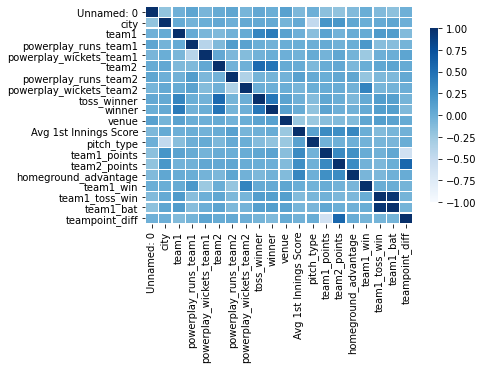

In [ ]:
sns.heatmap(correlation_matrix, cmap="Blues", vmin= -1, vmax=1, linewidth=0.3, cbar_kws={"shrink": .8})
plt.savefig('correlation_matrix.png')
plt.show()

Here, we see that team1_bat represents the same information as team1_toss_win. Strange, right? It’s just how the dataset was built, if team1 wins the toss then they will always bat and if team2 wins the toss then they will always field. So we removed the column team1_bat from our list of features.

**Drop redundant fields**

In [ ]:
# ***********************  DROP REDUNDANT FIELDS *********************** 
# Redundant fields: drop first one
data=data.drop(columns=['city', 'venue', 'toss_winner', 'toss_decision', 'winner', 'team1_bat'], axis=1)
# data=data.drop(columns=['team1_points', 'team2_points'], axis=1)
# data=data.drop(columns=['powerplay_runs_team1', 'powerplay_wickets_team1', 'powerplay_runs_team2', 'powerplay_wickets_team2'], axis=1)
data.head(10)


,Unnamed: 0,team1,powerplay_runs_team1,powerplay_wickets_team1,team2,powerplay_runs_team2,powerplay_wickets_team2,Avg 1st Innings Score,pitch_type,team1_points,team2_points,homeground_advantage,team1_win,team1_toss_win,teampoint_diff
0,0,9,59,1,2,54,1,185,1,660,805,1,1.0,0.0,145
1,1,5,61,1,7,59,1,160,-2,936,835,0,0.0,0.0,-101
2,2,4,52,1,3,73,0,183,1,536,812,1,0.0,0.0,276
3,3,7,35,1,1,56,2,160,1,835,768,2,0.0,0.0,-67
4,4,2,41,2,6,43,2,170,1,805,1178,1,1.0,1.0,373
5,5,4,40,2,9,59,1,185,1,536,660,2,0.0,0.0,124
6,6,3,59,2,5,49,0,194,2,812,936,2,0.0,0.0,124
7,7,2,23,3,1,62,1,160,1,805,768,2,0.0,1.0,-37
8,8,6,62,1,7,50,3,160,-2,1178,835,0,1.0,0.0,-343
9,9,9,34,0,5,61,2,194,2,660,936,2,0.0,0.0,276


In [ ]:
dataset_file="encoded_dataset.csv"
data.to_csv(dataset_file, index = True)
# df.head()
print("New file named '", dataset_file, "' exported successfully...")

New file named ' encoded_dataset.csv ' exported successfully...


---
## **Step 9 - Building, Training and Testing the Model**
---

In [ ]:
#data=data.drop(columns=['teampoint_diff'], axis=1)
data.head()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

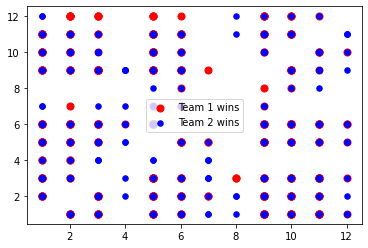

In [ ]:
#Splitting the data into training and testing data and scaling it
X=data.drop(columns=['team1_win'], axis=1)
target=list(map(int, data.team1_win.values))
team1_wins = data.loc[data.team1_win == 1]
team2_wins = data.loc[data.team1_win == 0]
team1_wins=team1_wins[["team1", "team2", "team1_toss_win", "teampoint_diff"]]
team2_wins=team2_wins[["team1", "team2", "team1_toss_win", "teampoint_diff"]]
plt.scatter(team1_wins.iloc[:, 0], team1_wins.iloc[:, 1], s=50, label='Team 1 wins', color="red")
plt.scatter(team2_wins.iloc[:, 0], team2_wins.iloc[:, 1], s=30, label='Team 2 wins', color="blue")
plt.legend()
plt.show()

#### **SIGMOID FUNCTION**

In [ ]:
def sigmoid_func(X, theta):
    # First ompute the weighted sum of inputs 
    z = np.dot(X, theta)
    # Activation function used to map any real value between 0 and 1
    return 1 / (1 + np.exp(-z))

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


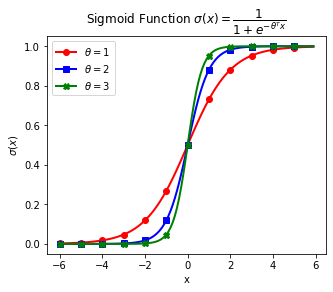

In [ ]:
# PLOT SIGMOID FUNCTION
theta=1
X=np.arange(start=-6, stop=6, step=0.1)
Y1=[]
Y2=[]
Y3=[]
for x in X:
    Y1.append(sigmoid_func(x, theta))
    Y2.append(sigmoid_func(x, 2*theta))
    Y3.append(sigmoid_func(x, 3*theta))

markinterval=10
test=plt.figure(figsize=(5, 4))
plt.plot(X, Y1, label="$\\theta =1$ ", color="red", marker='o', markevery=markinterval, linewidth=2)
plt.plot(X, Y2, label="$\\theta=2$", color="blue", marker='s', markevery=markinterval, linewidth=2)
plt.plot(X, Y3, label="$\\theta=3$", color="green", marker='X', markevery=markinterval, linewidth=2)
plt.title("Sigmoid Function $\\sigma(x)=\\dfrac{1}{1+e^{-\\theta^T x}}$")
plt.xlabel("x")
plt.ylabel("$\\sigma(x)$")
plt.legend()
test.savefig("Sigmoid.eps", format='eps')
test.show()

#### **GRADIENT FUNCTION**

In [ ]:
# Returns the probability after passing through sigmoid
def probability(X, theta):   
    return sigmoid_func(X, theta)
    
# Computes the weighted sum of inputs
def weighted_sum(X, theta):
    return np.dot(theta.transpose(), X).transpose()

# Computes the gradient of the cost function at the point theta
def gradient_descent(X, theta, y):
    h = sigmoid_func(X, theta)    
    m=y.shape[0] # m is the number of training samples
    return  weighted_sum(X, (h - y))/m

# Computes the cost function for all the training samples
def cost_function(X, y, theta):
    m = X.shape[0] # m is the number of training samples
    hx=probability(theta, x)
    term1 = np.dot(y.transpose(), np.log(hx))
    term2 = np.dot((1 - y).transpose(), np.log(1 - hx))
    net_cost = -np.sum(term1 + term2) / m
    return net_cost

def update_theta(theta, alpha, gradient):
    return theta - alpha*gradient

#### **FIT FUNCTION**

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score

def weightInitialization(n_features):
    w = np.zeros((1,n_features))
    b = 0
    return w,b
def sigmoid_activation(result):
    final_result = 1/(1+np.exp(-result))
    return final_result

def model_optimize(w, b, X, Y):
    m = X.shape[0]
    
    #Prediction
    final_result = sigmoid_activation(np.dot(w,X.T)+b)
    Y_T = Y.T
    cost = (-1/m)*(np.sum((Y_T*np.log(final_result)) + ((1-Y_T)*(np.log(1-final_result)))))
    #
    
    #Gradient calculation
    dw = (1/m)*(np.dot(X.T, (final_result-Y.T).T))
    db = (1/m)*(np.sum(final_result-Y.T))
    
    grads = {"dw": dw, "db": db}
    
    return grads, cost
def model_predict(w, b, X, Y, learning_rate, no_iterations):
    costs = []
    for i in range(no_iterations):
        #
        grads, cost = model_optimize(w,b,X,Y)
        #
        dw = grads["dw"]
        db = grads["db"]
        #weight update
        w = w - (learning_rate * (dw.T))
        b = b - (learning_rate * db)
        #
        
        if (i % 100 == 0):
            costs.append(cost)
            #print("Cost after %i iteration is %f" %(i, cost))
    
    #final parameters
    coeff = {"w": w, "b": b}
    gradient = {"dw": dw, "db": db}
    
    return coeff, gradient, costs

def predict(final_pred, m):
    y_pred = np.zeros((1,m))
    for i in range(final_pred.shape[1]):
        if final_pred[0][i] > 0.5:
            y_pred[0][i] = 1
    return y_pred
    

df=data
df.loc[df["teampoint_diff"] < 0, "teampoint_diff"] = 0
df.loc[df["teampoint_diff"] >= 0, "teampoint_diff"] = 1

X = df.drop(columns=["team1_win"], axis=1)
y = df['team1_win']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.132, random_state=0)
X_tr_arr = x_train
X_ts_arr = x_test
y_tr_arr = y_train.to_numpy()
y_ts_arr = y_test.to_numpy()
print('Input Shape', (X_tr_arr.shape))
print('Output Shape', x_test.shape)
#Get number of features
n_features = X_tr_arr.shape[1]
print('Number of Features', n_features)
w, b = weightInitialization(n_features)
#Gradient Descent
coeff, gradient, costs = model_predict(w, b, X_tr_arr, y_tr_arr, learning_rate=0.1,no_iterations=5000)
#Final prediction
w = coeff["w"]
b = coeff["b"]
print('Optimized weights', w)
print('Optimized intercept',b)
#
final_train_pred = sigmoid_activation(np.dot(w,X_tr_arr.T)+b)
final_test_pred = sigmoid_activation(np.dot(w,X_ts_arr.T)+b)
#
m_tr =  X_tr_arr.shape[0]
m_ts =  X_ts_arr.shape[0]
#
y_tr_pred = predict(final_train_pred, m_tr)
print('Training Accuracy',accuracy_score(y_tr_pred.T, y_tr_arr))
#
y_ts_pred = predict(final_test_pred, m_ts)
print('Test Accuracy',accuracy_score(y_ts_pred.T, y_ts_arr))


# Logistic Regression
from sklearn.linear_model import SGDClassifier
logreg = SGDClassifier(max_iter=5000)
logreg.fit(x_train, y_train)
print('\n\n\nAccuracy of Logistic Regression Classifier on test set: {:.4f}'.format(logreg.score(x_test, y_test)))
print('Accuracy of Logistic Regression Classifier on train set: {:.4f}'.format(logreg.score(x_train, y_train)))
parameters = logreg.coef_
print("Params are ", parameters)


Input Shape (704, 14)
Output Shape (108, 14)
Number of Features 14


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in multiply


Optimized weights [[-1.69956745e+01  1.45532375e+01  3.95770115e+02 -5.82595441e+01
   1.12724982e+01 -4.48421334e+02  8.60244610e+01  4.48228352e+01
  -7.69411963e+00 -2.77841106e+01 -3.83537496e+01 -1.21651715e+01
  -1.25861745e+00 -1.73442134e-01]]
Optimized intercept -0.17344213363866967
Training Accuracy 0.5369318181818182
Test Accuracy 0.6203703703703703



Accuracy of Logistic Regression Classifier on test set: 0.5278
Accuracy of Logistic Regression Classifier on train set: 0.5810
Params are  [[  214.92306417   111.32904224  5182.73985469 -1031.52020774
    259.95193237 -6163.15367828  1464.12884334   240.89063234
   -217.4093207   -160.50167132   129.5615901   -229.84060333
    -36.46509572   -11.05002901]]


#### **Prediction function**

In [ ]:
df=data
df.loc[df["teampoint_diff"] < 0, "teampoint_diff"] = 0
df.loc[df["teampoint_diff"] >= 0, "teampoint_diff"] = 1

X = df.drop(columns=["team1_win"], axis=1)
y = df['team1_win']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.132, random_state=0)
# x_train = x_train.to_numpy()
# x_test = x_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()
learning_rate=[0.1]
iterations = 100


for l_rate in learning_rate:
    theta = np.zeros(x_train.shape[1])    # size = total features        
    print("Learning rate:", l_rate)
    print("Iterations:", iterations)

    for i in range(iterations):        
        gradient = gradient_descent(x_train, theta, y_train)
        theta = update_theta(theta, l_rate, gradient)

    theta = np.zeros(x_train.shape[1])
    pred_y = sigmoid_func(x_test, theta)

    pred_y_round_off = pd.DataFrame()
    pred_y_round_off['confidence']=pred_y
    # print(y_test)

    pred_y_round_off.loc[pred_y_round_off['confidence'] < 0.5, "y_hat_predicted"] = 0
    pred_y_round_off.loc[pred_y_round_off['confidence'] >= 0.5, "y_hat_predicted"] = 1

    pred_y_round_off['y_team1_win'] = pd.DataFrame(y_test)

    print("Dataframe...")
    print(pred_y_round_off.head(10))
    accuracy = (pred_y_round_off.loc[pred_y_round_off['y_hat_predicted'] == pred_y_round_off['y_team1_win']].shape[0]/pred_y_round_off.shape[0])*100
    print("Accuracy: ", accuracy)

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
print('Accuracy of Logistic Regression Classifier on test set: {:.4f}'.format(logreg.score(x_test, y_test)))
parameters = logreg.coef_
print("Params are ", parameters)

Learning rate: 0.1
Iterations: 100
Dataframe...
   confidence  y_hat_predicted  y_team1_win
0         0.5              1.0          0.0
1         0.5              1.0          1.0
2         0.5              1.0          1.0
3         0.5              1.0          0.0
4         0.5              1.0          1.0
5         0.5              1.0          1.0
6         0.5              1.0          0.0
7         0.5              1.0          0.0
8         0.5              1.0          1.0
9         0.5              1.0          1.0
Accuracy:  38.88888888888889
Accuracy of Logistic Regression Classifier on test set: 0.7037
Params are  [[ 2.06118860e-04 -1.04430328e-03  2.21089923e-02 -4.00464699e-01
   1.52348805e-02 -3.19316998e-02  5.15986458e-01  1.24104194e-03
  -6.29553372e-02  1.22049298e-04 -1.69451660e-04 -9.41538553e-02
  -7.88644294e-03 -8.96024790e-03]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**Splitting the data-set into training and testing**



		******************TEST SPLIT:  0.132 ******************
Accuracy of Logistic regression:  71.29629629629629 %
Confusion Matrix: 
[[44 22]
 [ 9 33]]


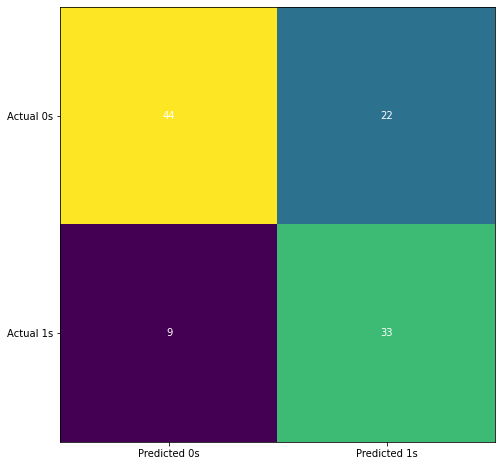

Accuracy of Logistic Regression Classifier for 4 folds on test set: 0.6835
Scores: [0.66009852 0.71921182 0.65517241 0.69950739]
_______________________________________________________________

Accuracy of Random forest classifier 75.0 %
Confusion Matrix: 
[[47 19]
 [ 8 34]]
Accuracy of Random forest classifier for 4 folds on test set: 0.6552
Scores: [0.66420664 0.64575646 0.65555556]


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean

split =0.132
while split <= 0.132:
    
    print("\n\n\t\t******************TEST SPLIT: ", split, "******************")
    X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=split, random_state=0,shuffle=True)
    
    #Data Preprocessing
    sc_x= StandardScaler()
    X_train=sc_x.fit_transform(X_train)
    X_test=sc_x.transform(X_test)

    # ********************************* Model 1 ********************************* 
    # Passing Logistic regression
    classifier=LogisticRegression(random_state=0)
    classifier.fit(X_train,y_train)
    #Predicting on Test Set
    y_pred1=classifier.predict(X_test)
    #Importing Accuracy Score from Metrics
    from sklearn.metrics import accuracy_score
    accuracy = accuracy_score(y_test,y_pred1)
    print("Accuracy of Logistic regression: ", accuracy*100, "%")
    #confusion matrix
    print("Confusion Matrix: ")
    cm1=confusion_matrix(y_test,y_pred1)
    print(cm1)
    
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cm1)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm1[i, j], ha='center', va='center', color='white')
    plt.show()

    # prepare the cross-validation procedure
    cv = KFold(n_splits=4, random_state=1, shuffle=True)
    scores = cross_val_score(classifier, X, target, scoring='accuracy', cv=cv, n_jobs=-1)
    print('Accuracy of Logistic Regression Classifier for 4 folds on test set: {:.4f}'.format(mean(scores)))
    print('Scores:', scores)

    print("_______________________________________________________________")
    # ********************************* Model 2 ********************************* 
    # Training the Random Forest Classification model on the Training set
    classifier = RandomForestClassifier(n_estimators = 812, criterion = 'gini', random_state = 0)
    classifier.fit(X_train, y_train)
    # Predicting the Test set results
    y_pred2= classifier.predict(X_test)
    #Accuracy Score
    accuracy = accuracy_score(y_test,y_pred2)
    print("\nAccuracy of Random forest classifier", accuracy*100, "%")
    # Making the Confusion Matrix
    print("Confusion Matrix: ")
    cmm = confusion_matrix(y_test, y_pred2)
    print(cmm)
    # prepare the cross-validation procedure
    cv = KFold(n_splits=3, random_state=1, shuffle=True)
    scores = cross_val_score(classifier, X, target, scoring='accuracy', cv=cv, n_jobs=-1)
    print('Accuracy of Random forest classifier for 4 folds on test set: {:.4f}'.format(mean(scores)))
    print('Scores:', scores)


    split += 0.004


### **Using K-fold Cross-Validation**:
to maximize the use of the available data for training and then testing a model.

Applying various models

In [ ]:
#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of Logistic Regression Classifier on test set: {:.4f}'.format(logreg.score(X_test, y_test)))

#Decision Tree Classifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_pred = dtree.predict(X_test)
print('Accuracy of Decision Tree Classifier on test set: {:.4f}'.format(dtree.score(X_test, y_test)))

#SVM
svm=SVC()
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
print('Accuracy of SVM Classifier on test set: {:.4f}'.format(svm.score(X_test, y_test)))

#Random Forest Classifier
randomForest= RandomForestClassifier(n_estimators=100)
randomForest.fit(X_train,y_train)
y_pred = randomForest.predict(X_test)
print('Accuracy of Random Forest Classifier on test set: {:.4f}'.format(randomForest.score(X_test, y_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy of Logistic Regression Classifier on test set: 0.7008
Accuracy of Decision Tree Classifier on test set: 0.5861
Accuracy of SVM Classifier on test set: 0.5984
Accuracy of Random Forest Classifier on test set: 0.6762


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean

# prepare the cross-validation procedure
cv = KFold(n_splits=8, random_state=1, shuffle=True)

# Logistic Regression
logreg = LogisticRegression()
scores = cross_val_score(logreg, X, target, scoring='accuracy', cv=cv, n_jobs=-1)
print('\nAccuracy of Logistic Regression Classifier on test set: {:.4f}'.format(mean(scores)))
print('Scores:', scores)

#Decision Tree Classifier
dtree=DecisionTreeClassifier()
scores = cross_val_score(dtree, X, target, scoring='accuracy', cv=cv, n_jobs=-1)
print('\nAccuracy of Decision Tree Classifier on test set: {:.4f}'.format(mean(scores)))
print('Scores:', scores)

#SVM
svm=SVC()
scores = cross_val_score(svm, X, target, scoring='accuracy', cv=cv, n_jobs=-1)
print('\nAccuracy of SVM Classifier on test set: {:.4f}'.format(mean(scores)))
print('Scores:', scores)

#Random Forest Classifier
randomForest= RandomForestClassifier(n_estimators=100)
scores = cross_val_score(randomForest, X, target, scoring='accuracy', cv=cv, n_jobs=-1)
print('\nAccuracy of Random Forest Classifier on test set: {:.4f}'.format(mean(scores)))
print('Scores:', scores)


Accuracy of Logistic Regression Classifier on test set: 0.6761
Scores: [0.70588235 0.61764706 0.70588235 0.68627451 0.68316832 0.6039604
 0.68316832 0.72277228]

Accuracy of Decision Tree Classifier on test set: 0.5691
Scores: [0.61764706 0.48039216 0.54901961 0.50980392 0.6039604  0.6039604
 0.54455446 0.64356436]

Accuracy of SVM Classifier on test set: 0.5480
Scores: [0.49019608 0.5        0.64705882 0.58823529 0.57425743 0.4950495
 0.5049505  0.58415842]

Accuracy of Random Forest Classifier on test set: 0.6441
Scores: [0.62745098 0.67647059 0.68627451 0.60784314 0.64356436 0.66336634
 0.57425743 0.67326733]


#### Extra 

**Overfitting:**

Index(['team1', 'Pplay T1', 'pplay twick1', 'team2', 'Pplay T2',
       'pplay twick2', 'dl_applied', 'winner', 'win_by_runs', 'win_by_wickets',
       'venue', 'Avg 1st Innings Score', 'Avg 2nd Innings Score', 'Pitch Type',
       'team1_win', 'team1_toss_win', 'team1_bat', 'is_tied'],
      dtype='object')


Accuracy of Logistic Regression Classifier on test set: 0.9632

Accuracy of Decision Tree Classifier on test set: 0.9509

Accuracy of SVM Classifier on test set: 0.8712

Accuracy of Random Forest Classifier on test set: 0.9571



**Using K-fold:** K=5

Accuracy of Logistic Regression Classifier on test set: 0.9359

Accuracy of Decision Tree Classifier on test set: 0.9335

Accuracy of SVM Classifier on test set: 0.8546

Accuracy of Random Forest Classifier on test set: 0.9507

**Using K-fold:** K=6

Accuracy of Logistic Regression Classifier on test set: 0.9396

Accuracy of Decision Tree Classifier on test set: 0.9397

Accuracy of SVM Classifier on test set: 0.8547

Accuracy of Random Forest Classifier on test set: 0.9507

**Using K-fold:** K=8

Accuracy of Logistic Regression Classifier on test set: 0.9397

Accuracy of Decision Tree Classifier on test set: 0.9299

Accuracy of SVM Classifier on test set: 0.8559

Accuracy of Random Forest Classifier on test set: 0.9557

**Using K-fold:** K=9

Accuracy of Logistic Regression Classifier on test set: 0.9408

Accuracy of Decision Tree Classifier on test set: 0.9421

Accuracy of SVM Classifier on test set: 0.8572

Accuracy of Random Forest Classifier on test set: 0.9557


**Using K-fold:** K=10

Accuracy of Logistic Regression Classifier on test set: 0.9396

Accuracy of Decision Tree Classifier on test set: 0.9298

Accuracy of SVM Classifier on test set: 0.8584

Accuracy of Random Forest Classifier on test set: 0.9544


In [ ]:
matches=pd.read_csv("finalest_ipl.csv")

dict = {"Punjab Cricket Association Stadium, Mohali":["KXIP"], "MA Chidambaram Stadium, Chepauk":["CSK"], "Rajiv Gandhi International Stadium, Uppal": ["SRH","DC"]
        , "Feroz Shah Kotla":["DD","DC"], "M Chinnaswamy Stadium":["RCB"], "Wankhede Stadium":["MI"], "Dr DY Patil Sports Academy":["MI","DC","PWI"]
        , "Eden Gardens":["KKR"], "Sawai Mansingh Stadium":["RR"], "Newlands":["None"], "St George's Park":["None"], "De Beers Diamond Oval":["None"]
        , "Buffalo Park":["None"], "SuperSport Park":["None"], "Kingsmead":["None"], "New Wanderers Stadium":["None"], "Brabourne Stadium":["None"]
        , "Himachal Pradesh Cricket Association Stadium":["KXIP"], "Barabati Stadium": ["DC","KXIP","KKR"], "Sardar Patel Stadium, Motera": ["RR"]
        , "Vidarbha Cricket Association Stadium, Jamtha":["None"], "Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium":["SRH"]
        , "Subrata Roy Sahara Stadium":["None"], "JSCA International Stadium Complex":["KKR","CSK"], "Shaheed Veer Narayan Singh International Stadium":["None"]
        , "Sheikh Zayed Stadium":["None"], "Dubai International Cricket Stadium":["None"], "Sharjah Cricket Stadium":["None"]
        , "Maharashtra Cricket Association Stadium":["KXIP","RPS","CSK"], "Punjab Cricket Association IS Bindra Stadium, Mohali":["KXIP"]
        , "Holkar Cricket Stadium":["KXIP"], "M. A. Chidambaram Stadium":["CSK"], "M. Chinnaswamy Stadium":["RCB"]
        , "Feroz Shah Kotla Ground":["DD","DC"], "ACA-VDCA Stadium":["DC","SRH","MI","RPS"], "Rajiv Gandhi Intl. Cricket Stadium":["DC","SRH"]
        , "IS Bindra Stadium":["KXIP"]
}

team1_home_advantage = []

for index, row in matches.iterrows():
    dict_team_names = dict.get(row['venue'])
    
    if(row['team1'] in dict_team_names):
        if(row['team2'] in dict_team_names):
            team1_home_advantage.append(0)
        else:
            team1_home_advantage.append(1)
    elif(row['team2'] in dict_team_names):
        team1_home_advantage.append(-1)
    else:
        team1_home_advantage.append(0)

print(len(team1_home_advantage))
from csv import writer
from csv import reader
# Open the input_file in read mode and output_file in write mode
with open('finalest_ipl.csv', 'r') as read_obj, \
        open('finalest_ipl1.csv', 'w', newline='') as write_obj:
    # Create a csv.reader object from the input file object
    csv_reader = reader(read_obj)
    # Create a csv.writer object from the output file object
    csv_writer = writer(write_obj)
    # Read each row of the input csv file as list
    i=-1
    for row in csv_reader:
        # Append the default text in the row / list
        if(i>-1):
            row.append(team1_home_advantage[i])
        
        i+=1
        # Add the updated row / list to the output file
        csv_writer.writerow(row)

**Remove:**

'id', 'season', 'date', 'player_of_match'

**Encode: numbers**

'team1', 'team2', 'toss_winner' , 'winner', 'city', 'venue',

**Encode: boolean**

'Pitch Type'

**New field: boolean**

'winner' => 'team1_win' : team1 wins the match (1) ? else (0)

'toss_winner' => 'team1_toss_win' : team1 wins the toss (1) ? else (0)

'toss_decision' => 'team1_bat' : team1 bats first (1) ? else (0)
 
'result' => 'is_tied' : is the matched tied (1) ? or normal (0) ?

**New field**

teampoint_difference

'homeground_advantage': team1 plays on homeground (1) ? team2 plays on homeground (-1) ? no team plays on homeground - overeseas ground (0) ?

**Redundant fields:** drop first one

*'city', 'venue'*

*'toss_winner'*, 'team1_toss_win'

'toss_decision', 'team1_bat'
  
'result', 'is_tied'

**No change:**

'win_by_runs', 'win_by_wickets', 'Avg 1st Innings Score', 'Avg 2nd Innings Score', 'Pplay T1', 'pplay twick1', 'team2', 'Pplay T2', 'pplay twick2', 'dl_applied'


In [ ]:
# ***********************  ENCODE   ***********************  
# encode teams
IPL_teams=list(set(df['team1']).union(set(df['team2'])))
count=1  
encoding_key={}
for team_name in IPL_teams:
  encoding_key[team_name]=count
  df.replace(team_name, count, inplace=True)
  count += 1
print("Encoding for teams: ", encoding_key)

# encode city
IPL_city=list(set(df['city']))
count=1  
encoding_key={}
for city in IPL_city:
  encoding_key[city]=count
  df.replace(city, count, inplace=True)
  count += 1
print("Encoding for city: ", encoding_key)

# encode venue
IPL_venue=list(set(df['venue']))
count=1  
encoding_key={}
for venue in IPL_venue:
  encoding_key[venue]=count
  df.replace(venue, count, inplace=True)
  count += 1
print("Encoding for venue: ", encoding_key)


# ***********************  ENCODE : BOOLEAN  ***********************  

# encode pitch type
df.replace("Batting & Spinner Friendly", -2, inplace=True)
df.replace("Bowling", -1, inplace=True)
df.replace("Batting", 1, inplace=True)
df.replace("Both", 2, inplace=True)

# ***********************  NEW FIELD : BOOLEAN  ***********************  

# 'winner' => 'team1_win' : team1 wins the match (1) ? else (0)
# outcome variable team1_win as a probability of team1 winning the match
df.loc[df["winner"]==df["team1"],"team1_win"]=1
df.loc[df["winner"]!=df["team1"],"team1_win"]=0

# 'toss_winner' => 'team1_toss_win' : team1 wins the toss (1) ? else (0)
#outcome variable team1_toss_win as a value of team1 winning the toss
df.loc[df["toss_winner"]==df["team1"],"team1_toss_win"]=1
df.loc[df["toss_winner"]!=df["team1"],"team1_toss_win"]=0

# 'toss_decision' => 'team1_bat' : team1 bats first (1) ? else (0)
#outcome variable team1_bat to depict if team1 bats first
df["team1_bat"]=0
df.loc[(df["team1_toss_win"]==1) & (df["toss_decision"]=="bat"),"team1_bat"]=1

# 'result' => 'is_tied' : is the matched tied (1) ? or normal (0) ?
# encode result
df.loc[df["result"]=="tie","is_tied"]=1
df.loc[df["result"]=="normal","is_tied"]=0

# ***********************  NEW FIELD : DERIVED  ***********************  

df['teampoint_diff']=df['team2_points']-df['team1_points']

"""
  #encoding the numeric values
  encoder= preprocessing.LabelEncoder()

  df["city"]=encoder.fit_transform(df["city"])
  df["team1"]=encoder.fit_transform(df["team1"])
  df["team2"]=encoder.fit_transform(df["team2"])
  df["winner"]=encoder.fit_transform(df["winner"].astype(str))
  df["toss_winner"]=encoder.fit_transform(df["toss_winner"])
  df["venue"]=encoder.fit_transform(df["venue"])
"""